In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [90]:
wine=pd.read_csv('/content/drive/MyDrive/WineQT.csv')

In [91]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [92]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [93]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [94]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [95]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [96]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [97]:
wine.nunique

<bound method DataFrame.nunique of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.

<Axes: xlabel='fixed acidity'>

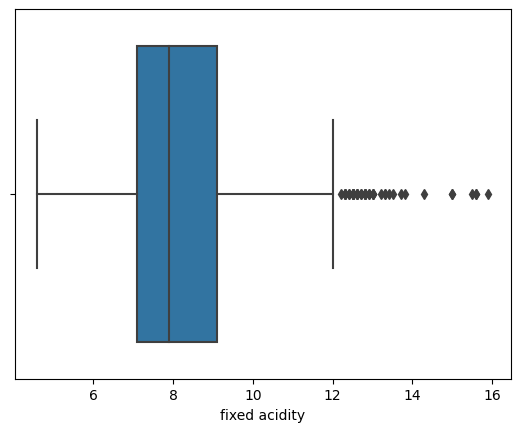

In [98]:
sns.boxplot(x =wine['fixed acidity'], data = wine )

<Axes: xlabel='quality'>

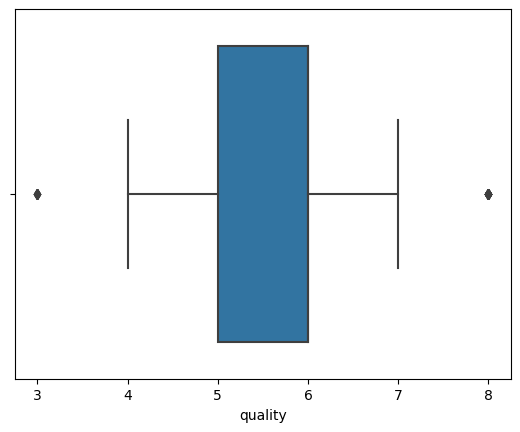

In [99]:
sns.boxplot(x =wine['quality'], data = wine )

In [100]:
from scipy.stats import skew

fixed acidity
1.0435581570203705


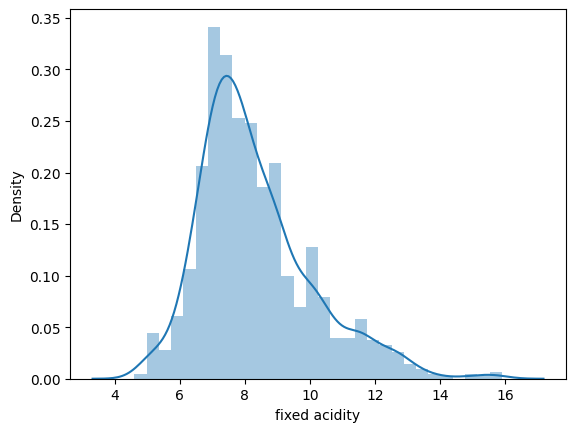

volatile acidity
0.6806526689497612


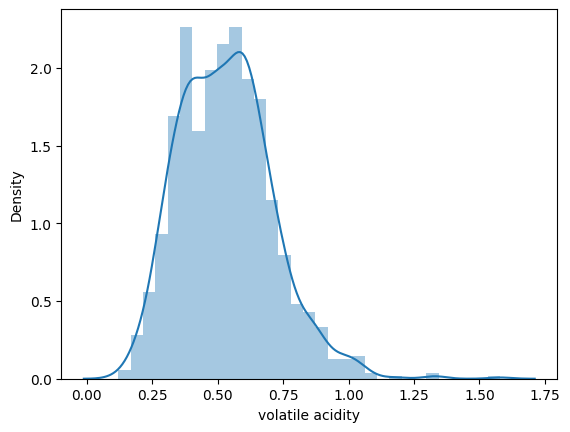

citric acid
0.3710729929318701


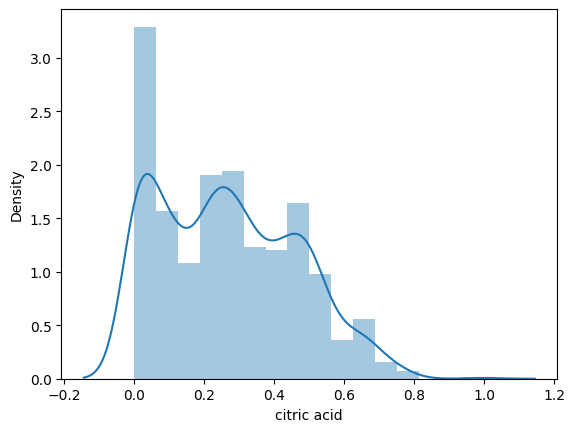

residual sugar
4.355371093085976


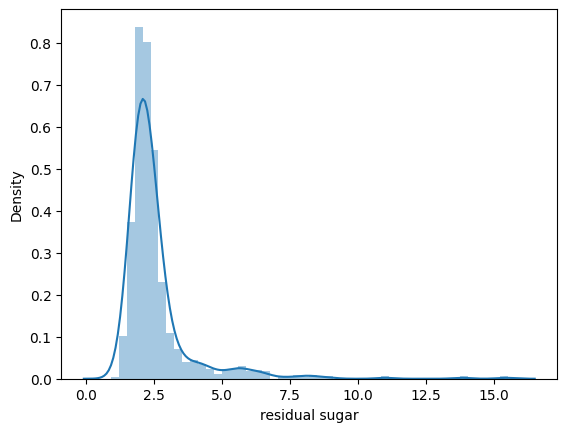

chlorides
6.018448660519524


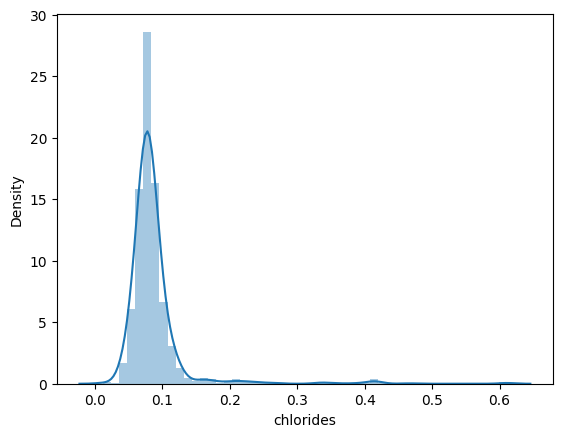

free sulfur dioxide
1.229644739026475


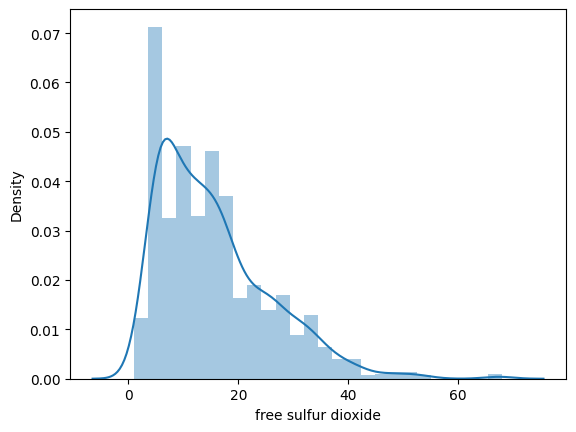

total sulfur dioxide
1.6635791721121174


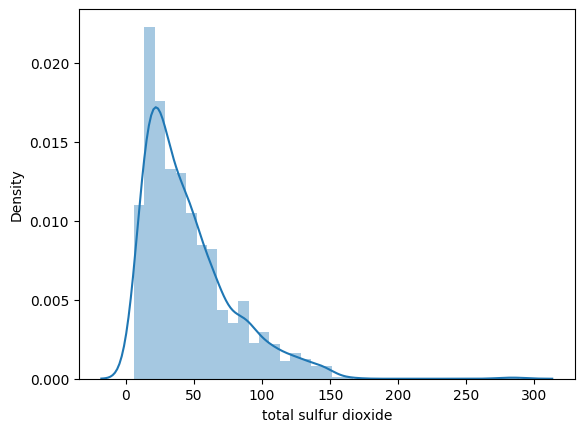

density
0.10226068292206784


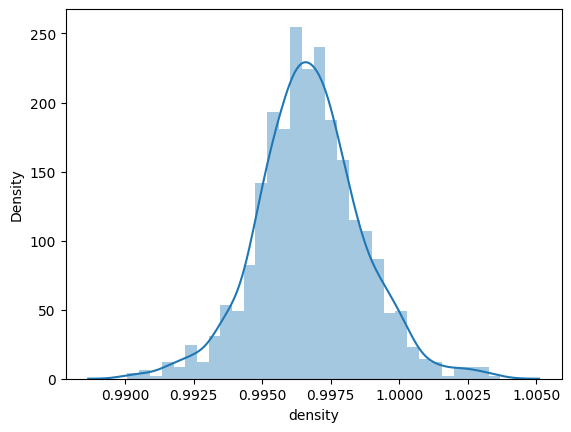

pH
0.22084807837665207


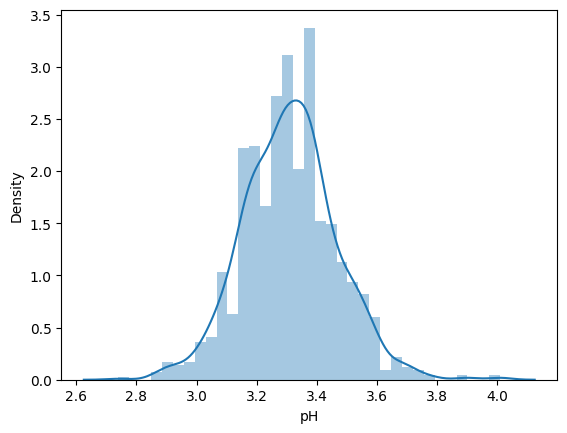

sulphates
2.4939876038821924


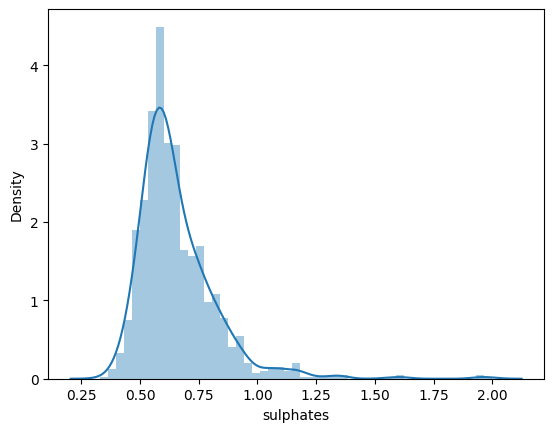

alcohol
0.8621798614666255


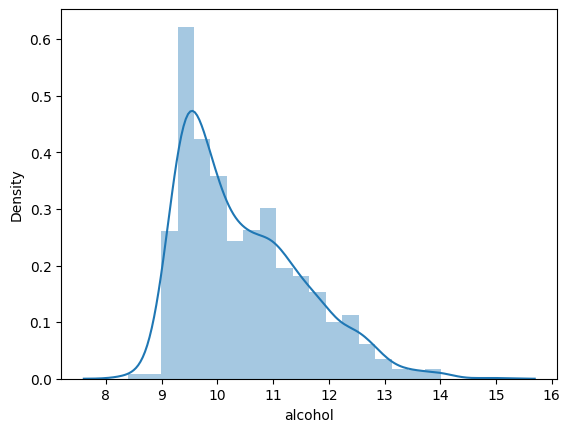

quality
0.2864151961088048


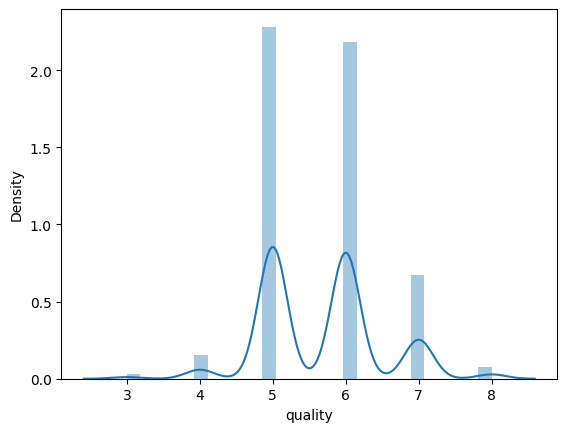

Id
-0.010405535902206199


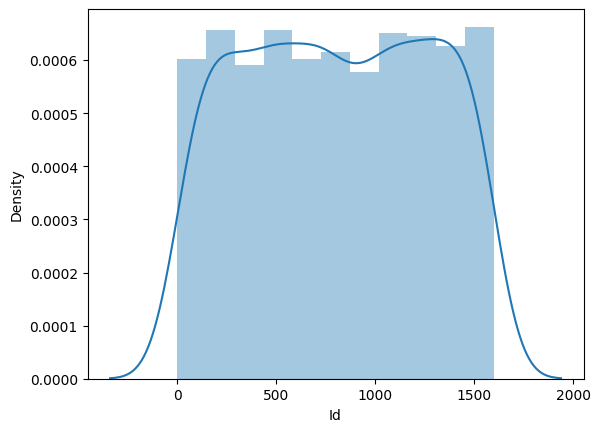

In [101]:
for col in wine:
    print(col)
    print(skew(wine[col]))

    plt.figure()
    sns.distplot(wine[col])
    plt.show()

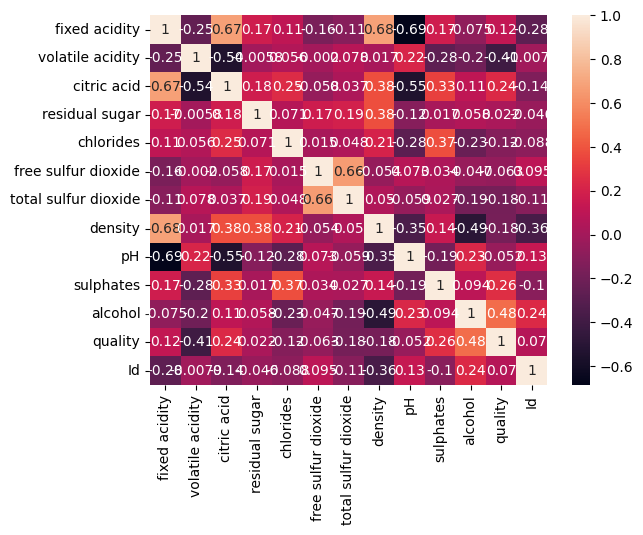

In [102]:
sns.heatmap(wine.corr(),annot=True)
plt.show()

In [103]:
wine["chlorides"]=np.log(wine["chlorides"])

In [104]:
wine["residual sugar"]=np.log(wine["residual sugar"])

In [105]:
wine["sulphates"]=np.sqrt(wine["sulphates"])

In [106]:
skew(wine["residual sugar"])

1.738751513956744

In [107]:
skew(wine["sulphates"])

1.618528488382546

In [108]:
skew(wine["chlorides"])

1.6301932153870087

In [109]:
low_threshold=4
high_threshold=6
wine['Quality Mapping']  =  ''

wine.loc[wine['quality']  < low_threshold,'Quality Mapping']='Low'
wine.loc[(wine['quality'] >=low_threshold) & (wine['quality'] < high_threshold),'Quality Mapping'] = 'Medium'
wine.loc[wine['quality']>=high_threshold, 'Quality Mapping'] = 'High'

print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        0.641854  -2.577022   
1            7.8              0.88         0.00        0.955511  -2.322788   
2            7.8              0.76         0.04        0.832909  -2.385967   
3           11.2              0.28         0.56        0.641854  -2.590267   
4            7.4              0.70         0.00        0.641854  -2.577022   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51   0.748331   
1                 25.0                  67.0   0.9968  3.20   0.824621   
2                 15.0                  54.0   0.9970  3.26   0.806226   
3                 17.0                  60.0   0.9980  3.16   0.761577   
4                 11.0                  34.0   0.9978  3.51   0.748331   

   alcohol  quality  Id Quality Mapping  
0      9.4        5   0          Medium  
1 

In [110]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Quality Mapping
0,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,0.9978,3.51,0.748331,9.4,5,0,Medium
1,7.8,0.88,0.00,0.955511,-2.322788,25.0,67.0,0.9968,3.20,0.824621,9.8,5,1,Medium
2,7.8,0.76,0.04,0.832909,-2.385967,15.0,54.0,0.9970,3.26,0.806226,9.8,5,2,Medium
3,11.2,0.28,0.56,0.641854,-2.590267,17.0,60.0,0.9980,3.16,0.761577,9.8,6,3,High
4,7.4,0.70,0.00,0.641854,-2.577022,11.0,34.0,0.9978,3.51,0.748331,9.4,5,4,Medium


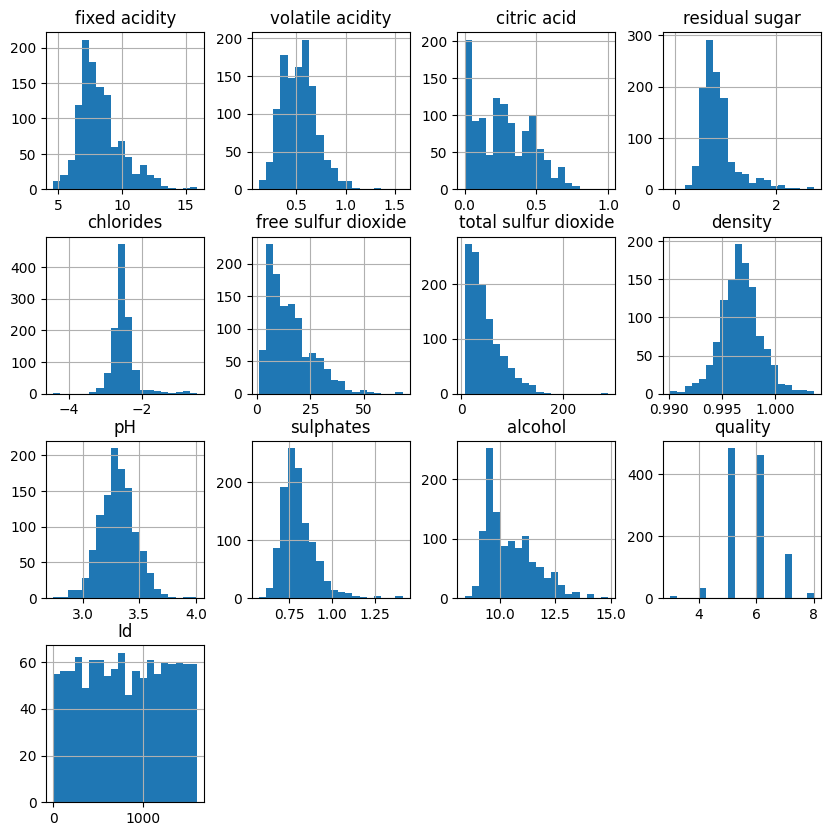

In [111]:
#histograms to visualize distribution of data with continuous values in the colunns of the dataset
wine.hist(bins=20,figsize=(10,10))
plt.show()

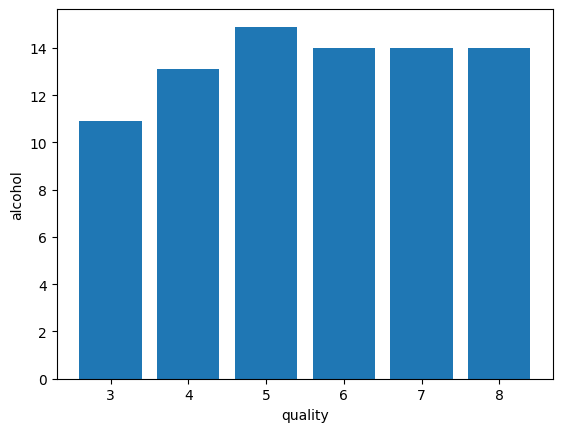

In [112]:
#countplot to visualize the number of data for each quality of wine
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [113]:
wine['quality'].min()

3

In [114]:
wine['alcohol'].max()

14.9

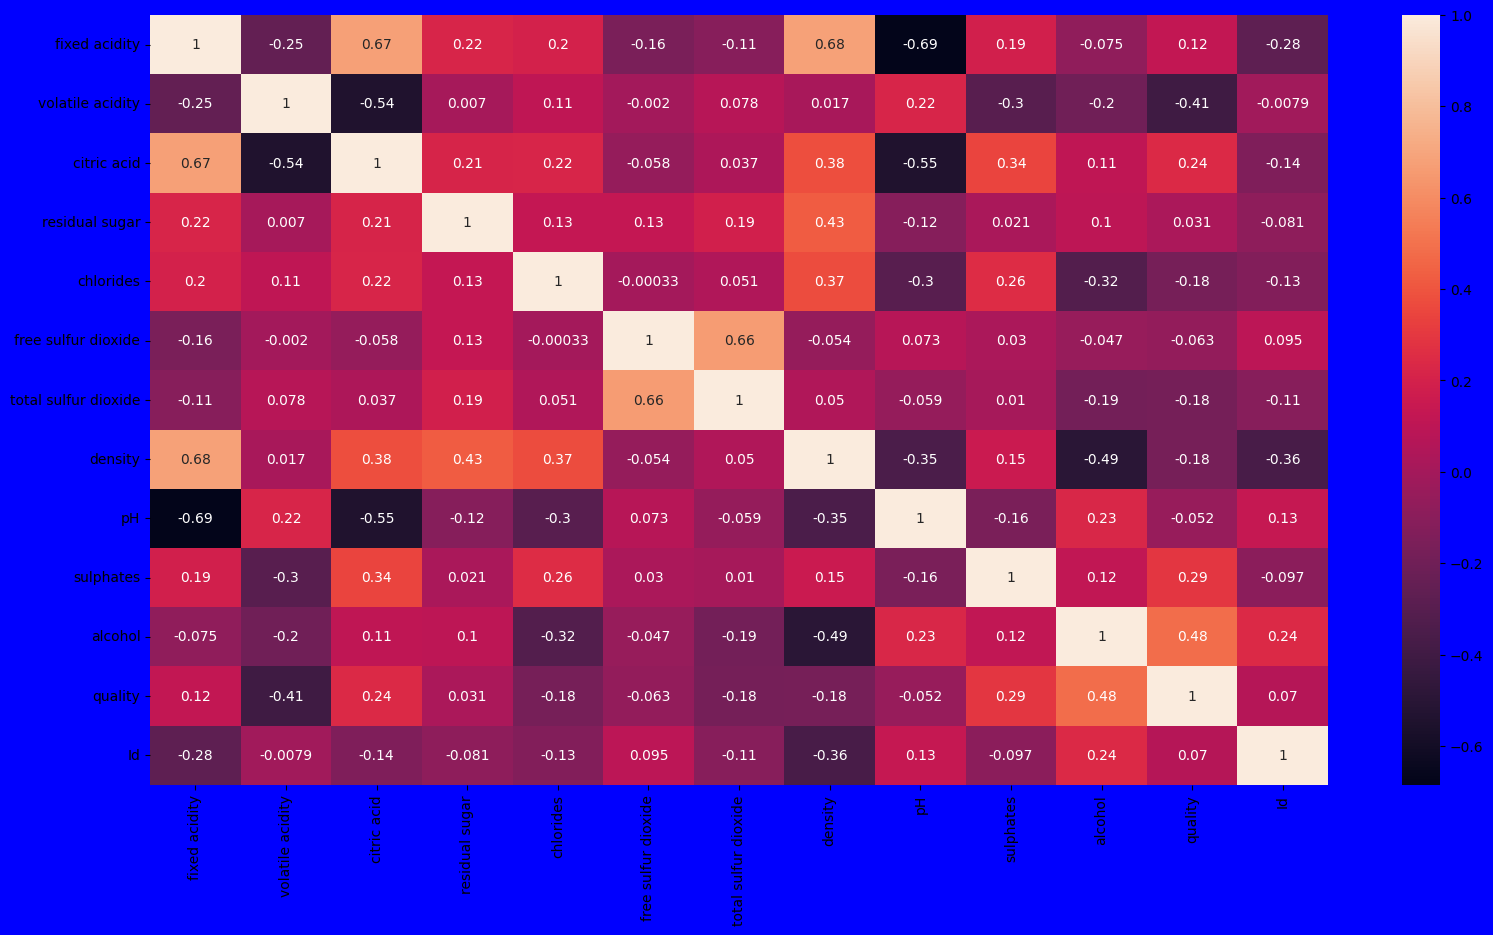

In [115]:
plt.figure(figsize=[19,10],facecolor='blue')
sns.heatmap(wine.corr() , annot=True)
plt.show()

In [116]:
wine['Quality Mapping']=wine['Quality Mapping'].map({'Low':0,'Medium':1,'High':2})

In [117]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,Quality Mapping
0,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.748331,9.4,5,0,1
1,7.8,0.880,0.00,0.955511,-2.322788,25.0,67.0,0.99680,3.20,0.824621,9.8,5,1,1
2,7.8,0.760,0.04,0.832909,-2.385967,15.0,54.0,0.99700,3.26,0.806226,9.8,5,2,1
3,11.2,0.280,0.56,0.641854,-2.590267,17.0,60.0,0.99800,3.16,0.761577,9.8,6,3,2
4,7.4,0.700,0.00,0.641854,-2.577022,11.0,34.0,0.99780,3.51,0.748331,9.4,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.832909,-2.577022,29.0,40.0,0.99574,3.42,0.866025,11.0,6,1592,2
1139,6.8,0.620,0.08,0.641854,-2.688248,28.0,38.0,0.99651,3.42,0.905539,9.5,6,1593,2
1140,6.2,0.600,0.08,0.693147,-2.407946,32.0,44.0,0.99490,3.45,0.761577,10.5,5,1594,1
1141,5.9,0.550,0.10,0.788457,-2.780621,39.0,51.0,0.99512,3.52,0.871780,11.2,6,1595,2


In [118]:
wine.drop(['Id'],axis=1,inplace=True)

In [119]:
Y=wine['Quality Mapping']
X=wine.drop(['quality','Quality Mapping'],axis=1)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [121]:
print(x_train.shape,y_train.shape)

(914, 11) (914,)


In [122]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
675,9.0,0.36,0.52,0.741937,-2.198225,5.0,10.0,0.99568,3.31,0.787401,11.3
653,8.6,0.47,0.27,0.832909,-2.900422,14.0,28.0,0.99516,3.18,0.894427,11.2
845,7.7,0.57,0.21,0.405465,-2.673649,4.0,9.0,0.99458,3.16,0.734847,9.8
1027,6.9,0.58,0.20,0.559616,-2.847312,8.0,22.0,0.99322,3.38,0.700000,11.7
1023,10.0,0.38,0.38,0.470004,-1.777857,27.0,90.0,0.99914,3.15,0.806226,8.5
...,...,...,...,...,...,...,...,...,...,...,...
626,6.8,0.57,0.00,0.916291,-2.631089,32.0,64.0,0.99491,3.43,0.748331,11.2
1016,7.6,0.41,0.33,0.916291,-2.551046,6.0,23.0,0.99570,3.30,0.761577,11.2
165,8.2,1.00,0.09,0.832909,-2.733368,7.0,37.0,0.99685,3.32,0.741620,9.0
7,7.3,0.65,0.00,0.182322,-2.733368,15.0,21.0,0.99460,3.39,0.685565,10.0


In [123]:
norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [126]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.777292576419214


In [127]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[  0   1   0]
 [  0  73  23]
 [  0  27 105]]


In [128]:
#prepare new data for prediction
new_wine = np.array([7.9,0.32,0.11,0.405111,2.673000,4.0,9.0,1,3.20,0.734000,9.8])
prediction=clf.predict(new_wine.reshape(1,-1))

In [129]:
#print prediction
print(prediction)

[1]


In [130]:
import pickle

In [131]:
#saving the trained model as a pickle string
with open('moddel.pkl','wb') as file:
  pickle.dump(clf,file)